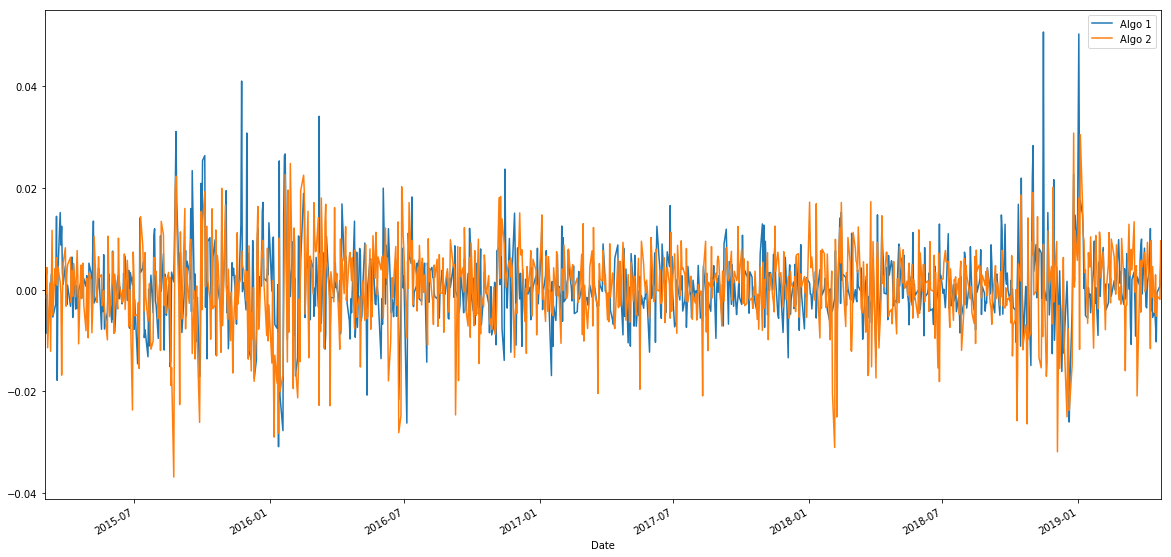

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Count nulls
whale_returns_data.count()
whale_returns_data.isnull()

# Drop nulls
whale_returns_data['SOROS FUND MANAGEMENT LLC'] = whale_returns_data['SOROS FUND MANAGEMENT LLC'].fillna('0')
whale_returns_data['PAULSON & CO.INC. '] = whale_returns_data['PAULSON & CO.INC. '].fillna('0')
whale_returns_data['TIGER GLOBAL MANAGEMENT LLC'] = whale_returns_data['TIGER GLOBAL MANAGEMENT LLC'].fillna('0')
whale_returns_data['BERKSHIRE HATHAWAY INC'] = whale_returns_data['BERKSHIRE HATHAWAY INC'].fillna('0')

whale_returns_data.dropna(inplace=True)
whale_returns_data.duplicated()
whale_returns_data.drop_duplicates()
whale_returns_data.isnull().sum()

# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Count nulls
algo_returns_data.count()
algo_returns_data.isnull()

# Drop nulls
algo_returns_data['Algo 1'] = algo_returns_data['Algo 1'].fillna('0')
algo_returns_data['Algo 2'] = algo_returns_data['Algo 2'].fillna('0')

algo_returns_data.dropna(inplace=True)
algo_returns_data.duplicated()
algo_returns_data.drop_duplicates()
algo_returns_data.isnull().sum()

# Reading S&P 500 Closing Prices
sp500_csv = Path("sp500_history.csv")
sp500_data = pd.read_csv(sp500_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# Check data types
sp500_data.dtypes

# Fix data types
sp500_data['Close'] = sp500_data['Close'].str.replace('$', '')
sp500_data.loc[:,'Close'] = sp500_data['Close'].astype('float')
sp500_data.dtypes

# Calculate Daily Returns
daily_returns = sp500_data.pct_change()
daily_returns.head()

# Drop nulls
daily_returns['Close'] = daily_returns['Close'].fillna('0')

daily_returns.dropna(inplace=True)
daily_returns.duplicated()
daily_returns.drop_duplicates()
daily_returns.isnull().sum()

# Rename Column
daily_returns.rename(columns={'Close': 'S&P 500'}, inplace=True)
daily_returns.head()

# Concatenate all DataFrames into a single DataFrame
all_daily_returns = pd.concat([whale_returns_data, algo_returns_data, daily_returns], axis='columns', join='inner')
all_daily_returns.plot(figsize=(20,10))